In [1]:
#--------IMPORT LIBRARIES----------
#!pip install qiskit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import pi
import warnings
import time
warnings.filterwarnings('ignore')
import pandas as pd
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
import math
from collections import Counter
from sklearn import metrics

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [3]:
#--------LOADING DATASET------------
dataset = pd.read_csv('fifa_world_cup_2022_tweets.csv')
dataset

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [4]:
def label(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else:
        return 0
dataset['True Label'] = dataset['Sentiment'].apply(label)
dataset

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,True Label
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,0
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,1
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,1
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,1
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,-1
...,...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive,1
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral,0
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive,1
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive,1


In [5]:
data = pd.read_csv('fifa_world_cup_2022_tweets.csv',
    usecols=['Tweet'])
data

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."
...,...
22519,Here We go World cup 2022 #WorldCup2022
22520,Anderlecht confirms former Viborg FF's Jesper ...
22521,Great thread to read before the start of #Worl...
22522,Raphinha wants Brazil to be united at the #Wor...


In [6]:
# Define a function to extract features from a tweet
def extract_features(tweet):
    analysis = TextBlob(tweet)
    
    # Get polarity (range: [-1, 1])
    polarity = analysis.sentiment.polarity
   
    # Get subjectivity (range: [0, 1])
    subjectivity = analysis.sentiment.subjectivity
    
    return polarity, subjectivity
data['polarity'], data['subjectivity'] = zip(*data['Tweet'].apply(extract_features))
data

,Tweet,polarity,subjectivity
0,What are we drinking today @TucanTribe \n@MadB...,0.000000,0.000000
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.231250,0.316667
2,Worth reading while watching #WorldCup2022 htt...,0.300000,0.100000
3,Golden Maknae shinning bright\n\nhttps://t.co/...,0.500000,0.650000
4,"If the BBC cares so much about human rights, h...",0.100000,0.150000
...,...,...,...
22519,Here We go World cup 2022 #WorldCup2022,0.000000,0.000000
22520,Anderlecht confirms former Viborg FF's Jesper ...,0.000000,0.000000
22521,Great thread to read before the start of #Worl...,0.800000,0.750000
22522,Raphinha wants Brazil to be united at the #Wor...,0.200000,0.100000


In [7]:
parameters = data[['polarity','subjectivity']]
def Min_Max_Scaler(parameters):
    scaler = MinMaxScaler()
    print(scaler.fit(parameters))
    #print(scaler.parameters_max_)
    transformed = scaler.transform(parameters)
    print("Trasnformed",transformed)
    return transformed
new_data = np.array(Min_Max_Scaler(parameters))
data['polarity'],data['subjectivity'] = new_data[:, 0],new_data[:, 1]
#data['polarity'],data['subjectivity'] = zip(*data['tweet'].apply(Min_Max_Scaler))
data

MinMaxScaler()
Trasnformed [[0.5        0.        ]
 [0.615625   0.31666667]
 [0.65       0.1       ]
 ...
 [0.9        0.75      ]
 [0.6        0.1       ]
 [0.50357143 0.425     ]]


,Tweet,polarity,subjectivity
0,What are we drinking today @TucanTribe \n@MadB...,0.500000,0.000000
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.615625,0.316667
2,Worth reading while watching #WorldCup2022 htt...,0.650000,0.100000
3,Golden Maknae shinning bright\n\nhttps://t.co/...,0.750000,0.650000
4,"If the BBC cares so much about human rights, h...",0.550000,0.150000
...,...,...,...
22519,Here We go World cup 2022 #WorldCup2022,0.500000,0.000000
22520,Anderlecht confirms former Viborg FF's Jesper ...,0.500000,0.000000
22521,Great thread to read before the start of #Worl...,0.900000,0.750000
22522,Raphinha wants Brazil to be united at the #Wor...,0.600000,0.100000


In [8]:
backend = Aer.get_backend('qasm_simulator')
def get_theta(d):
    x = d[0]
    y = d[1]
    theta = 2*math.acos((x+y)/2.0)
    return theta

In [9]:
def get_data(n,k):
   # data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    features = ['polarity','subjectivity']
   # print("data -------------",data)
    points = data[features].values
    p = points[:n]
    return p

In [10]:
def get_Distance(x,y):
    theta_1 = get_theta(x)
    theta_2 = get_theta(y)
    #theta_1 = get_theta_tmp(x)
    #theta_2 = get_theta_tmp(y)
    
    # create Quantum Register called "qr" with 3 qubits
    qr = QuantumRegister(3, name="qr")
    # create Classical Register called "cr" with 5 bits
    cr = ClassicalRegister(3, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
    qc = QuantumCircuit(qr, cr, name="k_means")
    
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.u(theta_1, pi, pi, qr[1])
    qc.u(theta_2, pi, pi, qr[2])
    qc.cswap(qr[0], qr[1], qr[2])
    qc.h(qr[0])

    qc.measure(qr[0], cr[0])
    qc.reset(qr)

    #print('----before run----')
    job = execute(qc,backend=backend, shots=1024)
    #print('----after run----')
    
    result = job.result()
    data = result.get_counts()
    
    if len(data)==1:
        return 0.0
    else:
        return data['001']/1024.0

In [11]:
def euclidean_distance(point1, point2):
    squared_sum = 0.0
    for i in range(len(point1)):
        squared_sum += (point1[i] - point2[i]) ** 2
    return math.sqrt(squared_sum)

In [12]:
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [13]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [14]:
def initialize_centers(points,k):
    print("points.shape[0]  ",points.shape[0])
    print("np.random.randint(points.shape[0],size=k) ------- ",np.random.randint(points.shape[0],size=k))
    return points[np.random.randint(points.shape[0],size=k),:]

In [15]:
def find_nearest_neighbour_quantum(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    centers_distance = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_Distance(points[i,:],centroids[j,:])
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
        centers_distance[i] = min_dis
    print(centers)
    def count_elements(centers):
        counter = Counter(centers)
        for element, count in counter.items():
            print(f"{element}: {count}")
    count_elements(centers)
    return centers, centers_distance

In [16]:
def find_nearest_neighbour_classical(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    centers_distance = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = euclidean_distance(points[i,:],centroids[j,:])
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
        centers_distance[i] = min_dis
    print(centers)
    def count_elements(centers):
        counter = Counter(centers)
        for element, count in counter.items():
            print(f"{element}: {count}")
    count_elements(centers)
    return centers, centers_distance

In [17]:
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
   
    centroids = np.zeros([k,2])
    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

In [18]:
def calculate_variance(centers, centers_distance):
    print(centers)
    k = int(np.max(centers))+1
    print(k)
    var = 0
    for i in range(k):
        #print(points[centers==i])
        var += np.average(centers_distance[centers==i])
    return var

In [20]:
n = int(input("Enter no. of data points:"))     # number of data points
k = 3     # Number of clusters

Enter no. of data points:100


drawing plot ----------- 


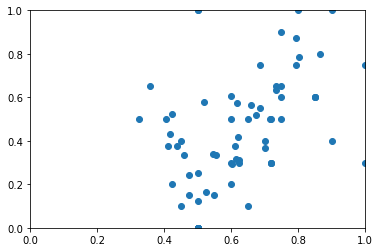

points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [99 57 52]
[[0.75       0.5       ]
 [0.35909091 0.65      ]
 [0.525      0.1625    ]]
points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [83 98 64]
Get Distance Before loop 0.1103515625
Iteration number:  0
[0. 0. 0. 1. 0. 0. 2. 0. 0. 1. 0. 2. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 1. 1. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 2. 0. 0. 1.
 0. 0. 0. 0.]
0.0: 70
1.0: 21
2.0: 9
[0. 0. 0. 1. 0. 0. 2. 0. 0. 1. 0. 2. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 1. 1. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 2. 0. 0. 1.
 0. 0. 0. 0.]
3


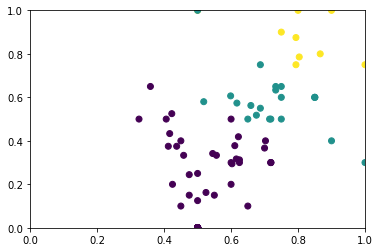

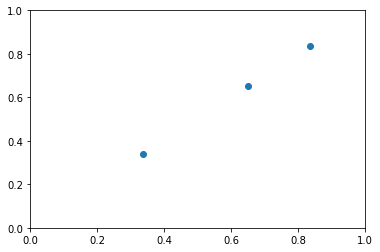

[[0.33811012 0.33811012]
 [0.65162934 0.65162934]
 [0.83711093 0.83711093]]
Get Distance in loop 0.10546875
Iteration number:  1
[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 1. 1. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 2. 0. 0. 2. 1. 0. 1.
 0. 0. 0. 0.]
0.0: 63
1.0: 27
2.0: 10
[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 1. 1. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 2. 0. 0. 2. 1. 0. 1.
 0. 0. 0. 0.]
3


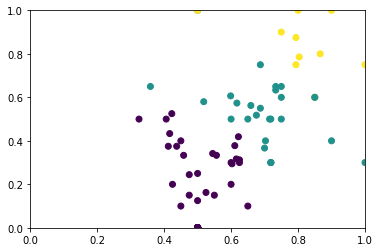

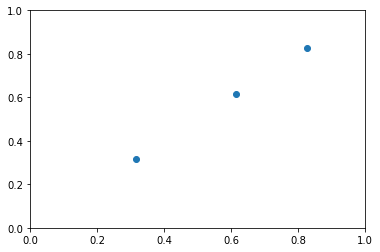

[[0.31746533 0.31746533]
 [0.61580032 0.61580032]
 [0.82589983 0.82589983]]
Get Distance in loop 0.0
points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [55 92 70]
Get Distance Before loop 0.1337890625
Iteration number:  2
[0. 1. 1. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 1. 2. 2. 2. 0. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 0. 0. 2. 0. 0. 1. 1. 0. 2.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 1. 1. 1. 1. 2. 1. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
0.0: 43
1.0: 27
2.0: 30
[0. 1. 1. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 1. 2. 2. 2. 0. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 0. 0. 2. 0. 0. 1. 1. 0. 2.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 1. 1. 1. 1. 2. 1. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
3


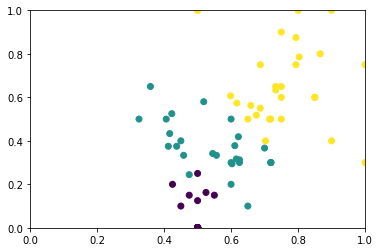

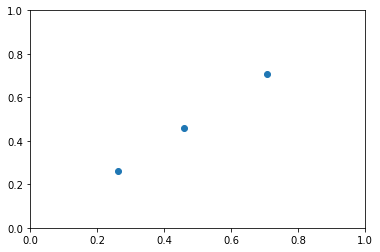

[[0.26235465 0.26235465]
 [0.45867541 0.45867541]
 [0.70734789 0.70734789]]
Get Distance in loop 0.111328125
Iteration number:  3
[0. 1. 1. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 1. 2. 2. 2. 1. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
0.0: 42
1.0: 30
2.0: 28
[0. 1. 1. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 1. 2. 2. 2. 1. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
3


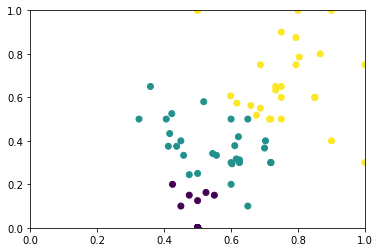

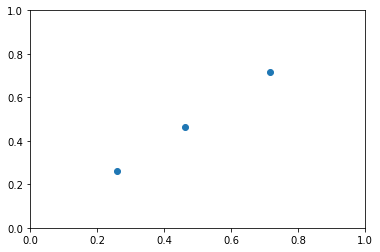

[[0.25967262 0.25967262]
 [0.46285417 0.46285417]
 [0.71764456 0.71764456]]
Get Distance in loop 0.0
points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [ 3 24 12]
Get Distance Before loop 0.126953125
Iteration number:  4
[0. 0. 1. 0. 2. 2. 2. 0. 0. 2. 0. 1. 0. 0. 1. 2. 0. 0. 1. 0. 0. 0. 2. 0.
 1. 0. 0. 2. 1. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 2. 0. 0.
 2. 0. 2. 1. 0. 1. 0. 2. 1. 2. 2. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 2.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0.
 1. 0. 1. 0.]
0.0: 60
1.0: 20
2.0: 20
[0. 0. 1. 0. 2. 2. 2. 0. 0. 2. 0. 1. 0. 0. 1. 2. 0. 0. 1. 0. 0. 0. 2. 0.
 1. 0. 0. 2. 1. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 2. 0. 0.
 2. 0. 2. 1. 0. 1. 0. 2. 1. 2. 2. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 2.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0.
 1. 0. 1. 0.]
3


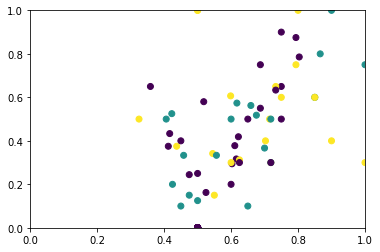

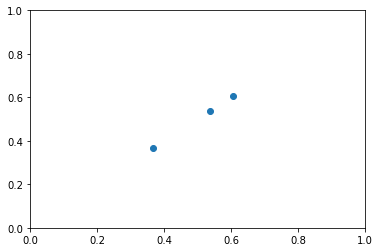

[[0.36753624 0.36753624]
 [0.53717024 0.53717024]
 [0.60451717 0.60451717]]
Get Distance in loop 0.0625
Iteration number:  5
[0. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 2. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 0. 2. 2. 2. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 2. 0. 0. 2. 1. 0. 1.
 0. 0. 0. 0.]
0.0: 57
1.0: 15
2.0: 28
[0. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 2. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 0. 2. 2. 2. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 2. 0. 0. 2. 1. 0. 1.
 0. 0. 0. 0.]
3


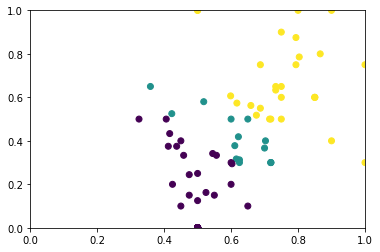

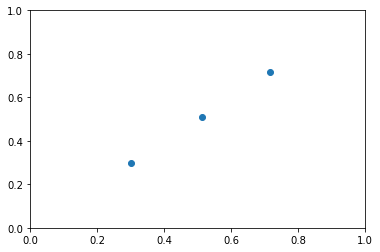

[[0.3002492  0.3002492 ]
 [0.5118447  0.5118447 ]
 [0.71764456 0.71764456]]
Get Distance in loop 0.0087890625


In [30]:
points = get_data(n,k)
plt.figure()      
print("drawing plot ----------- ")
draw_plot(points,None,label=False)
# run k-means algorithm
centroids = initialize_centers(points,k)  # Intialize centroids   100 ->(0,1)
print(centroids)
steps = 0
var_list = []
k_var_list = []
centers_list = [n]
k_centers_list = [n]
centers = []
s = 0
start = time.time()

while(steps<6):
    centroids = initialize_centers(points,k)   # Intialize centroids
    # run k-means algorithm
    p_var = [0,0]
    var = [0.5,0.5]
    var_list.append(var)
    print("Get Distance Before loop", get_Distance(p_var,var))
    while(get_Distance(p_var,var)>0.05):
        print("Iteration number: ", s)
        p_var = var
        centers, centers_distance = find_nearest_neighbour_quantum(points,centroids)# find nearest centers
        #centers = find_nearest_neighbour(points,centroids)
        var = calculate_variance(centers, centers_distance)
        var = [var, var]
        centroids = find_centroids(points,centers)               # find centroids
        #var_list.append(var)
        #centers_list.append(centers)
        plt.figure()
        draw_plot(points,centers)
        plot_centroids(centroids)
        print(centroids)
        print("Get Distance in loop", get_Distance(p_var,var))
        s=s+1
    steps = s
    steps=steps+1
    var_list.append(var)
    centers_list.append(centers)
    #print(var_list)
    min_var = min(var_list)
    #print("Var list", var_list)
    k_var_list.append(min_var)
    #k_centers_list.append(centers_list[var_list.index(min_var)])
#print("List",k_centers_list)
end = time.time()
q_execution_time = end - start

drawing plot ----------- 


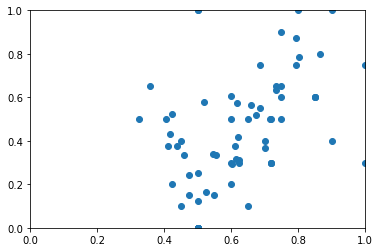

points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [ 5 24 76]
[[0.40625 0.5    ]
 [0.325   0.5    ]
 [0.71875 0.3    ]]
points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [61 87 97]
Get Distance Before loop 0.7071067811865476
Iteration number:  0
[0. 1. 0. 2. 0. 1. 2. 0. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 1. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 1. 0. 0.
 1. 2. 1. 2. 0. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 1. 2. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 2. 2. 0. 2.
 1. 0. 0. 0.]
0.0: 46
1.0: 30
2.0: 24
[0. 1. 0. 2. 0. 1. 2. 0. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 1. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 1. 0. 0.
 1. 2. 1. 2. 0. 1. 2. 1. 0. 2. 2. 0. 0. 1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 1. 2. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 2. 2. 0. 2.
 1. 0. 0. 0.]
3


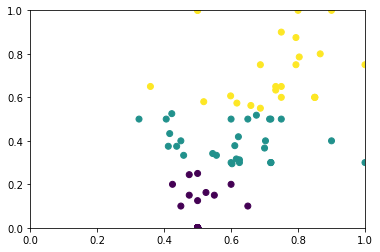

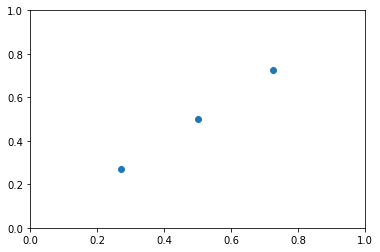

[[0.26991244 0.26991244]
 [0.50202639 0.50202639]
 [0.72538161 0.72538161]]
Get Distance in loop 0.06181600467221203
Iteration number:  1
[0. 1. 0. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 2. 0. 0.
 1. 2. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
0.0: 45
1.0: 33
2.0: 22
[0. 1. 0. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 2. 0. 0.
 1. 2. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
3


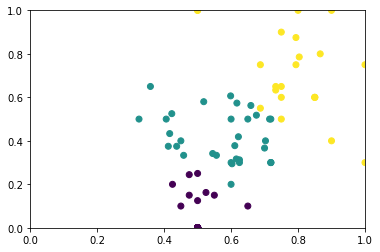

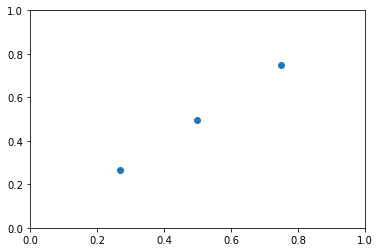

[[0.2670216  0.2670216 ]
 [0.49692279 0.49692279]
 [0.74870447 0.74870447]]
Get Distance in loop 0.38069581910966505
Iteration number:  2
[0. 1. 0. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 2. 0. 0.
 1. 1. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
0.0: 45
1.0: 34
2.0: 21
[0. 1. 0. 2. 0. 1. 2. 1. 1. 2. 1. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 1. 0.
 2. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 2. 0. 0.
 1. 1. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 0. 2. 1. 0. 1.
 1. 0. 0. 0.]
3


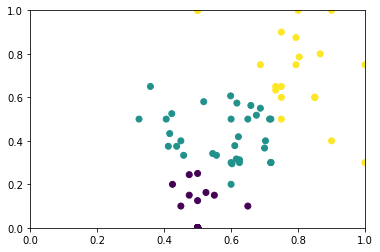

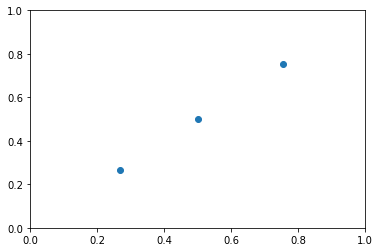

[[0.2670216  0.2670216 ]
 [0.50050595 0.50050595]
 [0.75489278 0.75489278]]
Get Distance in loop 0.003374812654527419
points.shape[0]   100
np.random.randint(points.shape[0],size=k) -------  [97 90 28]
Get Distance Before loop 0.7071067811865476
Iteration number:  3
[1. 1. 1. 2. 1. 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 0. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 2. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1.]
1.0: 72
2.0: 14
0.0: 14
[1. 1. 1. 2. 1. 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 0. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 2. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1.]
3


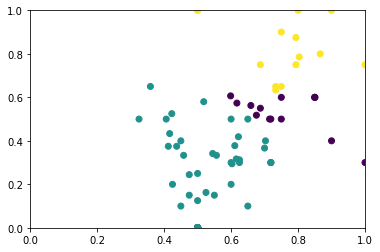

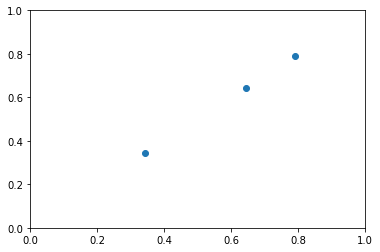

[[0.64402139 0.64402139]
 [0.3443316  0.3443316 ]
 [0.79126774 0.79126774]]
Get Distance in loop 0.1438110770876178
Iteration number:  4
[1. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 1. 0. 2. 2. 1. 0. 1. 1. 1. 1. 1.
 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 2. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 2. 1. 1. 2. 0. 1. 0.
 1. 1. 1. 1.]
1.0: 61
0.0: 25
2.0: 14
[1. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 1. 0. 2. 2. 1. 0. 1. 1. 1. 1. 1.
 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 2. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 2. 1. 1. 2. 0. 1. 0.
 1. 1. 1. 1.]
3


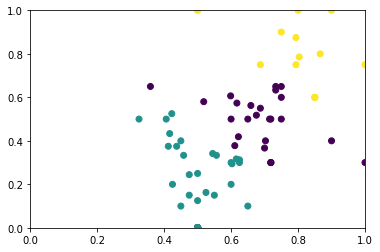

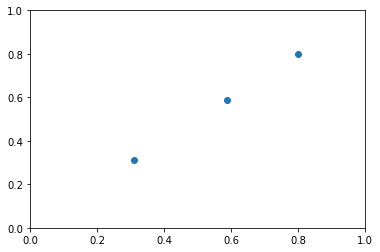

[[0.58890463 0.58890463]
 [0.31123867 0.31123867]
 [0.79841059 0.79841059]]
Get Distance in loop 0.11516403833999793
Iteration number:  5
[1. 0. 1. 2. 1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 0. 2. 2. 1. 0. 1. 1. 1. 1. 1.
 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 2. 1. 0. 0. 1. 1. 0. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 2. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 2. 0. 1. 2. 0. 1. 0.
 1. 1. 1. 1.]
1.0: 56
0.0: 29
2.0: 15
[1. 0. 1. 2. 1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 0. 2. 2. 1. 0. 1. 1. 1. 1. 1.
 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 2. 1. 0. 0. 1. 1. 0. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 2. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 2. 0. 1. 2. 0. 1. 0.
 1. 1. 1. 1.]
3


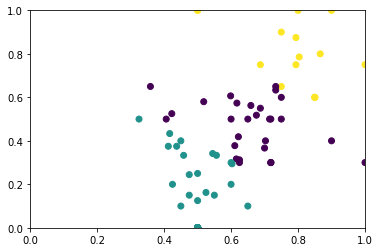

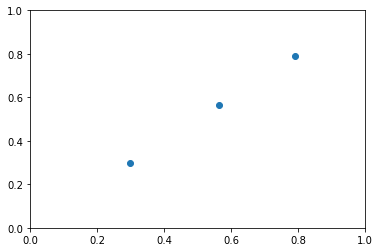

[[0.56369293 0.56369293]
 [0.29751928 0.29751928]
 [0.79184989 0.79184989]]
Get Distance in loop 0.0002579342677580314


In [31]:
points = get_data(n,k)
plt.figure()      
print("drawing plot ----------- ")
draw_plot(points,None,label=False)
# run k-means algorithm
centroids = initialize_centers(points,k)  # Intialize centroids   100 ->(0,1)
print(centroids)
steps = 0
var_list = []
k_var_list = []
centers_list = []
k_centers_list = []
centers1 = []
s = 0
start = time.time()

while(steps<6):
    centroids = initialize_centers(points,k)   # Intialize centroids
    # run k-means algorithm
    p_var = [0,0]
    var = [0.5,0.5]
    var_list.append(var)
    print("Get Distance Before loop", euclidean_distance(p_var,var))
    while( euclidean_distance(p_var,var)>0.05):
        print("Iteration number: ", s)
        p_var = var
        centers1, centers_distance = find_nearest_neighbour_classical(points,centroids)# find nearest centers
        #centers = find_nearest_neighbour(points,centroids)
        var = calculate_variance(centers1, centers_distance)
        var = [var, var]
        centroids = find_centroids(points,centers1)               # find centroids
        #var_list.append(var)
        #centers_list.append(centers)
        plt.figure()
        draw_plot(points,centers1)
        plot_centroids(centroids)
        print(centroids)
        print("Get Distance in loop",euclidean_distance(p_var,var))
        s=s+1
    steps = s
    steps=steps+1
    var_list.append(var)
    centers_list.append(centers1)
    #print(var_list)
    min_var = min(var_list)
    #print("Var list", var_list)
    k_var_list.append(min_var)
    #k_centers_list.append(centers_list[var_list.index(min_var)])
#print("List",k_centers_list)
end = time.time()
c_execution_time = end - start

In [32]:
print(centers)
twitter = pd.DataFrame(data[:n])
twitter['Label'] = centers
twitter

[0. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 2. 0. 0. 1. 2. 2. 0. 1. 0. 0. 0. 0. 0.
 2. 0. 2. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0.
 0. 2. 2. 2. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 2. 0. 0. 1. 1. 0. 1.
 2. 0. 0. 0. 0. 2. 2. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 2. 0. 0. 2. 1. 0. 1.
 0. 0. 0. 0.]


,Tweet,polarity,subjectivity,Label
0,What are we drinking today @TucanTribe \n@MadB...,0.500000,0.000000,0.0
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.615625,0.316667,1.0
2,Worth reading while watching #WorldCup2022 htt...,0.650000,0.100000,0.0
3,Golden Maknae shinning bright\n\nhttps://t.co/...,0.750000,0.650000,2.0
4,"If the BBC cares so much about human rights, h...",0.550000,0.150000,0.0
...,...,...,...,...
95,@GBNEWS The complete unsuitability of #Qatar t...,0.518333,0.580000,1.0
96,The AFCON 2019 opening ceremony in Egypt was b...,0.556250,0.333333,0.0
97,Fireworks at the FIFA World Cup Qatar 2022 ope...,0.500000,0.000000,0.0
98,@TheSun I thought we were a ''union of Equals'...,0.500000,0.125000,0.0


In [33]:
def label(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else:
        return 0
dataset['True Label'] = dataset['Sentiment'].apply(label)
dataset

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,True Label
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,0
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,1
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,1
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,1
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,-1
...,...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive,1
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral,0
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive,1
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive,1


In [34]:
#-----------FILTER DATA OR FEATURES BASED ON SENTIMENT--------------

is2 = twitter['Label'] == 2.0
is0 = twitter['Label'] == 0.0
is1 = twitter['Label'] == 1.0
#isNotDetect = data['Label'] == 'Cannot detected'
# Filter data
Data2 = twitter[is2].drop(['Label'], axis=1)
Data0 = twitter[is0].drop(['Label'], axis=1)
Data1 = twitter[is1].drop(['Label'], axis=1)
#notdetectData = data[isNotDetect].drop(['Label'], axis=1)
Data1

,Tweet,polarity,subjectivity
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.615625,0.316667
5,"And like, will the mexican fans be able to scr...",0.625000,0.312500
14,This is a good and promising project.should al...,0.700000,0.366667
18,Ready for Day 2 ✌🏻\n#QatarWorldCup2022 \n#Worl...,0.600000,0.500000
53,@ARmastrangelo @Cernovich He’s being ridiculou...,0.422917,0.525000
68,$og OG Fan Token is oficially the coin with le...,0.611111,0.377778
69,The real champions! #IranRevoIution #FIFA #Wor...,0.625000,0.300000
71,"Ian Wright: ""I'd take the fine for that [weari...",0.702778,0.400000
81,Curating a list of some of the best football (...,0.621875,0.418750
83,Good luck to the U.S. men's national soccer te...,0.718750,0.300000


In [35]:
# Finding the x-coords of the centroids
print("2:", sum(Data2['polarity']), len(Data2['polarity']), sum(Data2['subjectivity']))
print("0:", sum(Data0['polarity']), len(Data0['polarity']), sum(Data0['subjectivity']))
print("1:", sum(Data1['polarity']), len(Data1['polarity']), sum(Data1['subjectivity']))

x2c = sum(Data2['polarity']) / len(Data2['polarity'])
x0c = sum(Data0['polarity']) / len(Data0['polarity'])
x1c = sum(Data1['polarity']) / len(Data1['polarity'])
#xndc = sum(notdetectData['polarity']) / len(notdetectData['polarity'])
# Finding the y-coords of the centroids
y2c = sum(Data2['subjectivity']) / len(Data2['subjectivity'])
y0c = sum(Data0['subjectivity']) / len(Data0['subjectivity'])
y1c = sum(Data1['subjectivity']) / len(Data1['subjectivity'])


2: 21.23341295770202 28 18.95468253968254
0: 28.360353535353532 57 5.8680555555555545
1: 9.207979797979798 15 6.1473611111111115


In [36]:
my_dict = {2: x2c, 1: x1c, 0: x0c}
my_dict1 = {2: y2c, 1: y1c, 0: y0c}
p_list = [x2c,x1c,x0c]
s_list = [y2c,y1c,y0c]
max_value = max(p_list)
c1 = [key for key,v in my_dict.items() if v==max_value]
cluster1 = float(c1[0])
print(cluster1)
min_value = min(p_list)
c2 = [key for key,v in my_dict.items() if v==min_value]
cluster2 = float(c2[0])
print(cluster2)
max_value1 = max(s_list)
c3 = [key for key,v in my_dict1.items() if v==max_value1]
cluster3 = float(c3[0])
print(cluster3)
def cluster(Label):
    if Label == cluster1 and Label == cluster3:
        return 1
    elif Label == cluster2 and Label == cluster3:
        return -1
    else:
        return 0
twitter['Cluster'] = twitter['Label'].apply(cluster)
twitter

2.0
0.0
2.0


,Tweet,polarity,subjectivity,Label,Cluster
0,What are we drinking today @TucanTribe \n@MadB...,0.500000,0.000000,0.0,0
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.615625,0.316667,1.0,0
2,Worth reading while watching #WorldCup2022 htt...,0.650000,0.100000,0.0,0
3,Golden Maknae shinning bright\n\nhttps://t.co/...,0.750000,0.650000,2.0,1
4,"If the BBC cares so much about human rights, h...",0.550000,0.150000,0.0,0
...,...,...,...,...,...
95,@GBNEWS The complete unsuitability of #Qatar t...,0.518333,0.580000,1.0,0
96,The AFCON 2019 opening ceremony in Egypt was b...,0.556250,0.333333,0.0,0
97,Fireworks at the FIFA World Cup Qatar 2022 ope...,0.500000,0.000000,0.0,0
98,@TheSun I thought we were a ''union of Equals'...,0.500000,0.125000,0.0,0


In [37]:
from sklearn import metrics
true_labels = np.array(dataset['True Label'][:n])
q_clustered_labels = np.array(twitter['Cluster'])
accuracy = metrics.accuracy_score(true_labels,q_clustered_labels)
print("Quantum Accuracy:",accuracy*100,"%")

Quantum Accuracy: 48.0 %


In [38]:
twitter1 = pd.DataFrame(data[:n])
twitter1['Label'] = centers1
twitter1

,Tweet,polarity,subjectivity,Label
0,What are we drinking today @TucanTribe \n@MadB...,0.500000,0.000000,1.0
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.615625,0.316667,0.0
2,Worth reading while watching #WorldCup2022 htt...,0.650000,0.100000,1.0
3,Golden Maknae shinning bright\n\nhttps://t.co/...,0.750000,0.650000,2.0
4,"If the BBC cares so much about human rights, h...",0.550000,0.150000,1.0
...,...,...,...,...
95,@GBNEWS The complete unsuitability of #Qatar t...,0.518333,0.580000,0.0
96,The AFCON 2019 opening ceremony in Egypt was b...,0.556250,0.333333,1.0
97,Fireworks at the FIFA World Cup Qatar 2022 ope...,0.500000,0.000000,1.0
98,@TheSun I thought we were a ''union of Equals'...,0.500000,0.125000,1.0


In [39]:
#-----------FILTER DATA OR FEATURES BASED ON SENTIMENT--------------

is2 = twitter1['Label'] == 2.0
is0 = twitter1['Label'] == 0.0
is1 = twitter1['Label'] == 1.0
#isNotDetect = data['Label'] == 'Cannot detected'
# Filter data
Data2 = twitter1[is2].drop(['Label'], axis=1)
Data0 = twitter1[is0].drop(['Label'], axis=1)
Data1 = twitter1[is1].drop(['Label'], axis=1)
#notdetectData = data[isNotDetect].drop(['Label'], axis=1)
Data1

,Tweet,polarity,subjectivity
0,What are we drinking today @TucanTribe \n@MadB...,0.500000,0.000000
2,Worth reading while watching #WorldCup2022 htt...,0.650000,0.100000
4,"If the BBC cares so much about human rights, h...",0.550000,0.150000
7,Really? Football on a Monday morning at 9 and ...,0.600000,0.200000
8,"As the World Cup starts in Qatar, it’s Black A...",0.416667,0.433333
10,#Qatar tried to help its useless soccer team 5...,0.412500,0.375000
12,Let’s go #TeamUSA 🇺🇸🇺🇸🇺🇸#WorldCup2022,0.500000,0.000000
13,Tyler Adams will have a CAPTAIN moment this #W...,0.500000,0.000000
17,"Nicki Minaj, Maluma &amp; Myriam unite for #Wo...",0.500000,0.000000
19,@ALosersLament @Majstar7 @piersmorgan racist u...,0.500000,0.000000


In [40]:
# Finding the x-coords of the centroids
x2 = sum(Data2['polarity']) / len(Data2['polarity'])
x0 = sum(Data0['polarity']) / len(Data0['polarity'])
x1 = sum(Data1['polarity']) / len(Data1['polarity'])
#xndc = sum(notdetectData['polarity']) / len(notdetectData['polarity'])
# Finding the y-coords of the centroids
y2 = sum(Data2['subjectivity']) / len(Data2['subjectivity'])
y0 = sum(Data0['subjectivity']) / len(Data0['subjectivity'])
y1 = sum(Data1['subjectivity']) / len(Data1['subjectivity'])
print("2:", sum(Data2['polarity']), len(Data2['polarity']), sum(Data2['subjectivity']))
print("0:", sum(Data0['polarity']), len(Data0['polarity']), sum(Data0['subjectivity']))
print("1:", sum(Data1['polarity']), len(Data1['polarity']), sum(Data1['subjectivity']))

2: 11.694782366071427 15 12.060714285714285
0: 19.152860389610385 29 13.541329365079369
1: 27.954103535353532 56 5.3680555555555545


In [41]:
my_dict = {2: x2, 1: x1, 0: x0}
my_dict1 = {2: y2, 1: y1, 0: y0}
pc_list = [x2,x1,x0]
sc_list = [y2,y1,y0]
max_value = max(pc_list)
c1 = [key for key,v in my_dict.items() if v==max_value]
cluster1 = float(c1[0])
print(cluster1)
min_value = min(pc_list)
c2 = [key for key,v in my_dict.items() if v==min_value]
cluster2 = float(c2[0])
print(cluster2)
max_value1 = max(sc_list)
c3 = [key for key,v in my_dict1.items() if v==max_value1]
cluster3 = float(c3[0])
print(cluster3)
def cluster(Label):
    if Label == cluster1 and Label == cluster3:
        return 1
    elif Label == cluster2 and Label == cluster3:
        return -1
    else:
        return 0
twitter1['Cluster'] = twitter1['Label'].apply(cluster)
twitter1

2.0
1.0
2.0


,Tweet,polarity,subjectivity,Label,Cluster
0,What are we drinking today @TucanTribe \n@MadB...,0.500000,0.000000,1.0,0
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,0.615625,0.316667,0.0,0
2,Worth reading while watching #WorldCup2022 htt...,0.650000,0.100000,1.0,0
3,Golden Maknae shinning bright\n\nhttps://t.co/...,0.750000,0.650000,2.0,1
4,"If the BBC cares so much about human rights, h...",0.550000,0.150000,1.0,0
...,...,...,...,...,...
95,@GBNEWS The complete unsuitability of #Qatar t...,0.518333,0.580000,0.0,0
96,The AFCON 2019 opening ceremony in Egypt was b...,0.556250,0.333333,1.0,0
97,Fireworks at the FIFA World Cup Qatar 2022 ope...,0.500000,0.000000,1.0,0
98,@TheSun I thought we were a ''union of Equals'...,0.500000,0.125000,1.0,0


In [42]:
c_clustered_labels = np.array(twitter1['Cluster'])
c_accuracy = metrics.accuracy_score(true_labels,c_clustered_labels)
print("Classical Accuracy:",c_accuracy*100,"%")

Classical Accuracy: 43.0 %


In [43]:
print("Quantum Execution Time ", q_execution_time)
print("Classical Execution Time ", c_execution_time)

Quantum Execution Time  116.91439652442932
Classical Execution Time  5.966610670089722


In [44]:
similarity = metrics.accuracy_score(q_clustered_labels,c_clustered_labels)
print("Similarity:",similarity*100,"%")

Similarity: 87.0 %


In [45]:
#------TARGET POINT-------
# This is the point we need to classify
tweet = input("Enter a tweet: ")
x_p, y_p = extract_features(tweet)
print(x_p, y_p)
x_min = -1
x_max = 1
y_min = 0
y_max = 1
def min_max_scale(x,y,x_min,x_max,y_min,y_max):
    s_x = (x-x_min)/(x_max-x_min)
    s_y = (y-y_min)/(y_max-y_min)
    return s_x,s_y
x_p,y_p = min_max_scale(x_p,y_p,x_min,x_max,y_min,y_max)
print(x_p, y_p)

Enter a tweet: I love my India
0.5 0.6
0.75 0.6


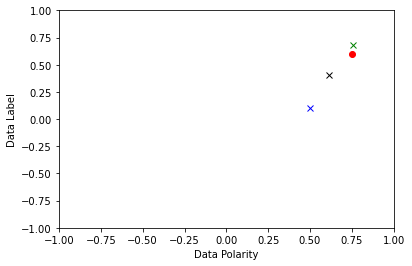

In [46]:
#----------PLOTTING POINTS----------
fig, ax = plt.subplots()
ax.set(xlabel='Data Polarity', ylabel='Data Label')

# Plotting the centroids
plt.plot(x2c, y2c, 'gx')
plt.plot(x0c, y0c, 'bx')
plt.plot(x1c, y1c, 'kx')
#plt.plot(xndc, yndc, 'cx')

# Plotting the new data point
plt.plot(x_p, y_p, 'ro')

# Setting the axis ranges
plt.axis([-1, 1, -1, 1])

plt.show()

In [47]:
# Calculating theta and phi values
phi_list = [((x + 1) * pi / 2) for x in [x_p, x2c,  x1c, x0c]]
theta_list = [((x + 1) * pi / 2) for x in [y_p, y2c, y1c, y0c]]

In [48]:
# Create a 3 qubit QuantumRegister - two for the vectors, and 
# one for the ancillary qubit
qreg = QuantumRegister(3, 'qreg')

# Create a one bit ClassicalRegister to hold the result
# of the measurements
creg = ClassicalRegister(1, 'creg')

qc = QuantumCircuit(qreg, creg, name='qc')

In [49]:
#-------CALCULATING DISTANCE USING QUANTUM ESTIMATOR-------------
# Get backend using the Aer provider
backend_sim = Aer.get_backend('qasm_simulator')

# Create list to hold the results
results_list_sim = []
# Estimating distances from the new point to the centroids
for i in range(1, 4):
    # Apply a Hadamard to the ancillary
    qc.h(qreg[2]) #ancillary is last

    # Encode new point and centroid from coordinate to bloch sphere
    qc.u3(theta_list[0], phi_list[0], 0, qreg[0]) #this is our red point        
    qc.u3(theta_list[i], phi_list[i], 0, qreg[1]) # this is all centroids

    # Perform controlled swap
    qc.cswap(qreg[2], qreg[0], qreg[1])
    # Apply second Hadamard to ancillary
    
    qc.h(qreg[2])

    # Measure ancillary
    qc.measure(qreg[2], creg[0])

    # Reset qubits
    qc.reset(qreg) # so that we can resuse it again, as it consumes less memory and space.

    # Register and execute job
    job_sim = execute(qc, backend=backend_sim, shots=1024)
    result_sim = job_sim.result().get_counts(qc) # count on |1>
    results_list_sim.append(result_sim['0']) # distance of each centroid from red
results_list_sim = [1024 - i for i in results_list_sim]
print(results_list_sim)

[3, 18, 90]


In [50]:
result_sim

{'0': 934, '1': 90}

In [51]:
from simple_colors import *
#--------COMPAIRING RESULTS---------
# Create a list to hold the possible classes
print("2: ", x2c, y2c)
print("1: ", x1c, y1c)
print("0: ", x0c, y0c)
print("New Data: ",x_p,y_p)
p_list = [x2c,x1c,x0c]
s_list = [y2c,y1c,y0c]
min_index = results_list_sim.index(min(results_list_sim))
result_value = p_list[min_index]
print(result_value)
result_value1 = s_list[min_index]
print(result_value1)
if all(result_value >= value for value in p_list) and all(result_value1 >= value for value in s_list):
    quantum_sim = 'Positive'
elif all(result_value <= value for value in p_list) and all(result_value1 >= value for value in s_list):
     quantum_sim = 'Negative'
else:
     quantum_sim = 'Neutral'
# Find out which class the new data point belongs to 

# according to our distance estimation algorithm
#quantum_real = class_list[results_list_real.index(min(results_list_real))]

# according to classical euclidean distance calculation

distances_list = [((x_p - i[0])**2 + (y_p - i[1])**2)**0.5 for i in [(x2c, y2c), (x1c, y1c), (x0c, y0c)]]
print(distances_list)
min_index_c = distances_list.index(min(distances_list))
result_value2 = p_list[min_index_c]
print(result_value2)
result_value3 = s_list[min_index_c]
print(result_value3)
if all(result_value2 >= value for value in p_list) and all(result_value3 >= value for value in s_list):
    classical_class = 'Positive'
elif all(result_value2 <= value for value in p_list) and all(result_value3 >= value for value in s_list):
     classical_class = 'Negative'
else:
     classical_class = 'Neutral'
        
# Print results
print(black("\nUsing Quantum Simulator", 'bold'), '\n')
print('Quantum Estimator distances: ', results_list_sim)
print('The new data point belongs to the {} Class'.format(quantum_sim), '\n')

#print(black("Using Real Quantum Computer",'bold'), '\n')
#print('Quantum Estimator distances: ', results_list_real)
#print('The new data point belongs to the {} Class'.format(quantum_real), '\n')

print(black("With Classical Approach",'bold'), '\n')
print('Euclidean Distances: ', distances_list)
print('The new data point belongs to the {} Class'.format(classical_class), '\n')

2:  0.7583361770607864 0.6769529478458051
1:  0.6138653198653199 0.4098240740740741
0:  0.4975500620237462 0.10294834307992201
New Data:  0.75 0.6
0.7583361770607864
0.6769529478458051
[0.07740315258533065, 0.2338793148979937, 0.5574866104501608]
0.7583361770607864
0.6769529478458051

Using Quantum Simulator 

Quantum Estimator distances:  [3, 18, 90]
The new data point belongs to the Positive Class 

With Classical Approach 

Euclidean Distances:  [0.07740315258533065, 0.2338793148979937, 0.5574866104501608]
The new data point belongs to the Positive Class 

